In [1]:
#######################
### L02 - Exercises ###
#######################

# importing libraries and setting up nice plots

import random
import numpy as np
import matplotlib.pyplot        as     plt
import matplotlib.patches       as     patches
import matplotlib.ticker		as     tck
import matplotlib.colors		as     colors
from   matplotlib				import rc
from   matplotlib.ticker		import FormatStrFormatter, MultipleLocator, FuncFormatter
from   matplotlib.gridspec		import GridSpec

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif" : ["Times New Roman"],
	"font.size"  : 15
    })
plt.rc('text.latex', preamble=r'\usepackage{amssymb}')

In [2]:
#########################################################
### L02 - Exercise 1: Monty Hall Problem + Variations ###
#########################################################

# For fun, I'd like to simulate the game as closely as I can
# (alternative version in the 100 doors variation)

# Let's fix the (large) number of games played:

N_Games = 1000000

# Let's define the prize pool
# then create the actual prizes behind the doors for each game
# by shuffling the prize pool each time

Prize_Pool  = ['car', 'goat', 'goat']
Door_Prizes_AllGames = []
for i in range(N_Games):
    Door_Prizes_i = Prize_Pool.copy()
    random.shuffle( Door_Prizes_i )
    Door_Prizes_AllGames.append( Door_Prizes_i )

# Let us now randomly extract the first door choice (door #0, #1 #2)
# (same choice for both keepers and switchers) 

Door_Choice_Keeper = np.random.randint(3, size=N_Games)

# Let us now make:
## the host open one goat door
## the switcher... switch door
## the newcomer choose between the two remaining closed doors

Door_Choice_Switcher = []
Door_Choice_Newcomer = []

for i in range(N_Games):
    # current game: door prize list (+ car, goats locations) and first door choice
    Door_Prizes_i = Door_Prizes_AllGames[i]
    Old_Door_i    = Door_Choice_Keeper[i]
    Car_Door_i    = Door_Prizes_i.index('car')
    Goat_Doors_i  = [ j for j, prize in enumerate(Door_Prizes_i) if prize != 'car']
    
    if Door_Prizes_i[Old_Door_i] == 'car':
        # host opens one random goat door
        Open_Goat_Door_i   = random.choice(Goat_Doors_i)
        Goat_Doors_i.remove(Open_Goat_Door_i)
        Closed_Goat_Door_i = Goat_Doors_i[0]
        # switcher chooses the other (closed) goat door :(
        Switcher_Door_i = Closed_Goat_Door_i
    else:
        # host opens the (only) other goat door
        Closed_Goat_Door_i = Old_Door_i
        Goat_Doors_i.remove(Old_Door_i)
        Open_Goat_Door_i   = Goat_Doors_i[0]
        # switcher chooses the (closed) car door :)
        Switcher_Door_i = Car_Door_i

    # newcomer chooses randomly between closed goat door, closed car door
    Newcomer_Door_i = random.choice([Closed_Goat_Door_i,Car_Door_i])

    Door_Choice_Switcher.append( Switcher_Door_i )
    Door_Choice_Newcomer.append( Newcomer_Door_i )

# Let us finally count the number of victories:
# for keeper, switcher and newcomer

Victories_Keeper   = 0
Victories_Switcher = 0
Victories_Newcomer = 0

for i in range(N_Games):
    
    Door_Prizes_i     = Door_Prizes_AllGames[i]
    Keeper_Choice_i   = Door_Choice_Keeper[i]
    Switcher_Choice_i = Door_Choice_Switcher[i]
    Newcomer_Choice_i = Door_Choice_Newcomer[i]
    
    if Door_Prizes_i[Keeper_Choice_i]   == 'car':
        Victories_Keeper += 1
    if Door_Prizes_i[Switcher_Choice_i] == 'car':
        Victories_Switcher += 1
    if Door_Prizes_i[Newcomer_Choice_i] == 'car':
        Victories_Newcomer += 1
    
Victories_Keeper   /= N_Games
Victories_Switcher /= N_Games
Victories_Newcomer /= N_Games


print('Number of simulations = {:d}'.format(N_Games))                       # for N_simulations to infinity
print('Probability that the keeper   wins = {:.5f} or equivalently {:2.3%}'.format(Victories_Keeper  , Victories_Keeper  ))       # result converges to 1/3
print('Probability that the switcher wins = {:.5f} or equivalently {:2.3%}'.format(Victories_Switcher, Victories_Switcher))       # result converges to 2/3
print('Probability that the newcomer wins = {:.5f} or equivalently {:2.3%}'.format(Victories_Newcomer, Victories_Newcomer))       # result converges to 1/2

Number of simulations = 1000000
Probability that the keeper   wins = 0.33427 or equivalently 33.427%
Probability that the switcher wins = 0.66573 or equivalently 66.573%
Probability that the newcomer wins = 0.50053 or equivalently 50.053%


In [3]:
# Variation: N_Doors = 100 
# (1 car, 99 goats, host opens 98 closed goat doors)

# For this variation, I wanted to test a simpler method
# Let's fix what's behind the doors: (let's call car = 1, goats = 0)
# Since order is irrelevant, let's create an array with [1,0,0,0,...,0]
# The number of simulations is N_games

N_Doors = 100
N_Games = 1000000

Door_Prize    = np.zeros(N_Games)
Door_Prize[0] = 1

# Let us now randomly extract the first door choice (door #0 #1 ... #99)
# (same choice for both keepers and switchers) 

Door_Choice_Keeper = np.random.randint(N_Doors, size=N_Games)

# The second choice of the switcher (first choice = keeper's choice):
# (pseudocode algorithm) 
# if first_choice = car door (door #0)
##### switcher abandons car door => gets goat door (any other door#, set to #1)
# if first_choice = goat door 
##### host eliminates all other 98 goat doors => switcher gets car door #0

Door_Choice_Switcher = []
for Chosen_Door in Door_Choice_Keeper:
    if Chosen_Door == 0:
        Door_Choice_Switcher.append(1)
    else:
        Door_Choice_Switcher.append(0)

# Since host always eliminates 98 closed goat doors, 
# the newcomer always chooses between a closed goat and car door

Door_Choice_Newcomer = np.random.randint(2, size=N_Games)

Victories_Keeper   = 0
Victories_Switcher = 0
Victories_Newcomer = 0

for (
    Keeper_i, 
    Switcher_i, 
    Newcomer_i
    ) in zip( 
    Door_Choice_Keeper, 
    Door_Choice_Switcher, 
    Door_Choice_Newcomer 
    ):
    Victories_Keeper   += Door_Prize[Keeper_i]
    Victories_Switcher += Door_Prize[Switcher_i]
    Victories_Newcomer += Door_Prize[Newcomer_i]

Victories_Keeper   /= N_Games
Victories_Switcher /= N_Games
Victories_Newcomer /= N_Games


print('Number of simulations = {:d}'.format(N_Games))                       # for N_simulations to infinity
print('Probability that the keeper   wins = {:.5f} or equivalently {:2.3%}'.format(Victories_Keeper, Victories_Keeper))      # result converges to 01/100
print('Probability that the switcher wins = {:.5f} or equivalently {:2.3%}'.format(Victories_Switcher, Victories_Switcher))  # result converges to 99/100
print('Probability that the newcomer wins = {:.5f} or equivalently {:2.3%}'.format(Victories_Newcomer, Victories_Newcomer))  # result converges to 50/100

Number of simulations = 1000000
Probability that the keeper   wins = 0.01013 or equivalently 1.013%
Probability that the switcher wins = 0.98987 or equivalently 98.987%
Probability that the newcomer wins = 0.49963 or equivalently 49.963%


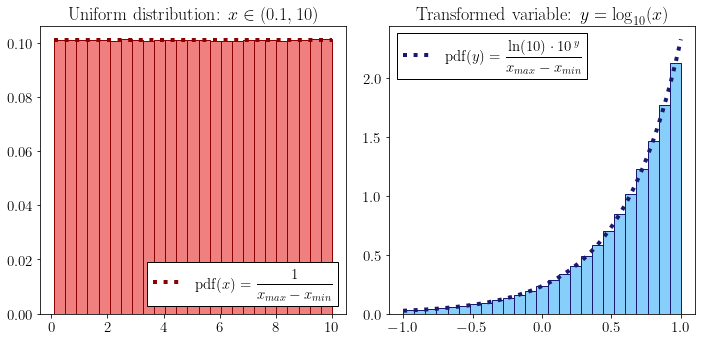

In [45]:
########################################
### L02 - Exercise 2: PDF of the log ###
########################################

N = 10000000

x_min = 0.1
x_max = 10.
x = np.random.uniform(x_min, x_max, size=N)

y = np.log10(x)
y_min = np.amin(y)
y_max = np.amax(y)

fig , ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title('Uniform distribution: ' + r'$x \in (0.1, 10)$')
ax[1].set_title('Transformed variable: ' + r'$ y = \log_{10}(x) $')


ax[0].hist(x, bins=25, density=True, edgecolor='darkred', color='lightcoral')
ax[1].hist(y, bins=25, density=True, edgecolor='midnightblue', color='lightskyblue')

# Formulae explained in a following markdown cell

def p_x(x):
    return np.full( len(x), fill_value = 1./(x_max - x_min) ) 

def p_y(y):
    tens = np.full(len(y), fill_value=10.)
    return 1./(x_max - x_min) * np.power(tens,y) * np.log(10)


label_p_x = r'$\textup{pdf}(x) = { \displaystyle \frac{1}{x_{max} - x_{min}} }$'
label_p_y = r'$\textup{pdf}(y) = { \displaystyle \frac{ \ln(10) \cdot 10^{\,y} }{x_{max} - x_{min}} }$'

tx = np.linspace(x_min, x_max, 1000)
ty = np.linspace(y_min, y_max, 1000)

ax[0].plot(tx, p_x(tx), color='darkred', lw=4, ls=':', label=label_p_x)
ax[1].plot(ty, p_y(ty), color='midnightblue', lw=4, ls=':', label=label_p_y)



ax[0].legend(frameon=True, framealpha=1, fancybox=False, edgecolor='black', loc=4)
ax[1].legend(frameon=True, framealpha=1, fancybox=False, edgecolor='black', loc=2)


fig.tight_layout()
fig.savefig('./L02_images/L02_pdf_log_histo.pdf', bbox_inches='tight')


$
    p(x) \, \textup{d}x 
    =
    p(y) \, \textup{d}y 
$

$
    \implies \quad
    p(x) 
    =
    p\big( y(x) \big) \, \bigg| 
        \dfrac{ \textup{d}y }{ \textup{d}x }
    \bigg|
    \quad ; \quad 
    p(y) 
    =
    p\big( x(y) \big) \, \bigg| 
        \dfrac{ \textup{d}x }{ \textup{d}y }
    \bigg|
$

$
    y(x) = \log_{10}(x)
    \quad \iff \quad
    x(y) = 10^{\,y}
    \quad ; \quad
    \bigg| 
        \dfrac{ \textup{d}x }{ \textup{d}y }
    \bigg|
    = \ln(10) \cdot 10^{\,y}
$

$
p(x) = \dfrac{ 1 }{ x_{max} - x_{min} } = p(x(y))
$

$
    \implies 
    p(y) 
    =
    p\big( x(y) \big) \, \bigg| 
        \dfrac{ \textup{d}x }{ \textup{d}y }
    \bigg|
    = \dfrac{ \ln(10) \cdot 10^{\,y} }{ x_{max} - x_{min} }
$



In [19]:
# p(x) dx = p(y(x)) dy

# p(x) = p(y) * |dy/dx|      # p(y) = p(x) * |dx/dy|

# y(x) = log(x)              # x(y) = 10^y

# |dy/dx| = 1/x * 1/ln(10)   # |dx/dy| = 10^y * ln(10)

# p(x) = 1/( x_max - x_min ) 

# p(y(x)) = p(x) * |dx/dy| =
#         = 1/( x_max - x_min ) * 10^y * ln(10)